In [22]:
import afq_transform as afqt
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score
from sklearn.pipeline import Pipeline

/Users/Adam/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
nodes = pd.read_csv('data/nodes.csv')
targets = pd.read_csv('data/subjects.csv', index_col='subjectID').drop(['Unnamed: 0'], axis='columns')
targets

,ALSFRS,ALSFRSbulbar,age,class,diseaseduration,gender
subjectID,,,,,,
subject_000,33,12,54,ALS,10,F
subject_001,18,8,69,ALS,36,M
subject_002,27,9,55,ALS,23,F
subject_003,32,12,52,ALS,15,M
subject_004,19,4,58,ALS,6,F
subject_005,33,8,67,ALS,48,F
subject_006,21,5,43,ALS,5,M
subject_007,38,8,67,ALS,3,M
subject_008,29,9,65,ALS,15,M


In [3]:
transformer = afqt.AFQFeatureTransformer()
x, groups, cols = transformer.transform(nodes)

In [4]:
label_sets = afqt.multicol2sets(cols)
label_sets

array([{'0', 'Callosum Forceps Major', 'ad'},
       {'1', 'Callosum Forceps Major', 'ad'},
       {'2', 'Callosum Forceps Major', 'ad'}, ...,
       {'Right Uncinate', 'volume', '97', 'Uncinate'},
       {'Right Uncinate', 'volume', '98', 'Uncinate'},
       {'99', 'Right Uncinate', 'volume', 'Uncinate'}], dtype=object)

In [5]:
metric_idx = cols.names.index('metric')
tract_idx = cols.names.index('tractID')

tracts_and_metrics = list(
    itertools.product(cols.levels[metric_idx], cols.levels[tract_idx])
)

tracts_only = [(x, ) for x in cols.levels[tract_idx]]

handed_tracts = [x for x in tracts_only if 'Left' in x[0] or 'Right' in x[0]]

tracts_symm = list(set([
    (x[0].replace('Left ', '').replace('Right ', ''), )
    for x in handed_tracts
]))

group_labels = tracts_and_metrics + tracts_symm + tracts_only

# Get the feature group importances for classifying the subject class

In [6]:
y = targets['ALSFRS'].values
y = y[y > 0]
x = x[y > 0]
y

/Users/Adam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 48 but corresponding boolean dimension is 24
  app.launch_new_instance()


array([33, 18, 27, 32, 19, 33, 21, 38, 29, 25, 33, 30, 21, 20, 18, 37, 33,
       29, 15, 24, 25, 34, 34, 35])

In [7]:
importances = afqt.get_random_forest_group_scores(
    x, y, group_labels, label_sets, type='regressor'
)

100%|██████████| 100/100 [09:13<00:00,  5.54s/it]


In [9]:
for idx, (f, s) in enumerate(importances):
    print('{idx:03d}. {i:+7.5f} : {f!s}'.format(idx=idx+1, i=s, f=f))

001. +0.02065 : ('Left IFOF',)
002. +0.01851 : ('IFOF',)
003. +0.01758 : ('SLF',)
004. +0.01206 : ('Left Corticospinal',)
005. +0.01108 : ('Left SLF',)
006. +0.00968 : ('ad', 'Left IFOF')
007. +0.00705 : ('md', 'Left Corticospinal')
008. +0.00684 : ('md', 'Left SLF')
009. +0.00671 : ('Callosum Forceps Minor',)
010. +0.00625 : ('md', 'Left Arcuate')
011. +0.00558 : ('curvature', 'Left IFOF')
012. +0.00541 : ('ad', 'Right Uncinate')
013. +0.00532 : ('Left Arcuate',)
014. +0.00525 : ('rd', 'Left Arcuate')
015. +0.00503 : ('Right SLF',)
016. +0.00502 : ('Thalamic Radiation',)
017. +0.00483 : ('md', 'Left IFOF')
018. +0.00463 : ('Corticospinal',)
019. +0.00407 : ('rd', 'Callosum Forceps Minor')
020. +0.00394 : ('ad', 'Left Cingulum Hippocampus')
021. +0.00383 : ('Arcuate',)
022. +0.00361 : ('rd', 'Left Corticospinal')
023. +0.00353 : ('ad', 'Left SLF')
024. +0.00319 : ('Left Thalamic Radiation',)
025. +0.00297 : ('ad', 'Left Uncinate')
026. +0.00294 : ('Left ILF',)
027. +0.00293 : ('torsion

# Restrict the feature groups to the non-overlapping tract-metric groups

In [11]:
tract_metric_importances = afqt.get_random_forest_group_scores(
    x, y, tracts_and_metrics, label_sets, type='regressor'
)

100%|██████████| 100/100 [08:04<00:00,  4.84s/it]


In [12]:
for idx, (f, s) in enumerate(tract_metric_importances):
    print('{idx:03d}. {i:+7.5f} : {f!s}'.format(idx=idx+1, i=s, f=f))

001. +0.00698 : ('ad', 'Left IFOF')
002. +0.00672 : ('md', 'Left Arcuate')
003. +0.00593 : ('md', 'Left IFOF')
004. +0.00592 : ('ad', 'Left SLF')
005. +0.00543 : ('rd', 'Left Corticospinal')
006. +0.00523 : ('md', 'Left Corticospinal')
007. +0.00516 : ('torsion', 'Left IFOF')
008. +0.00515 : ('ad', 'Left Cingulum Hippocampus')
009. +0.00458 : ('md', 'Left SLF')
010. +0.00423 : ('rd', 'Callosum Forceps Minor')
011. +0.00410 : ('cl', 'Left SLF')
012. +0.00408 : ('rd', 'Left Arcuate')
013. +0.00382 : ('curvature', 'Left IFOF')
014. +0.00369 : ('ad', 'Right Uncinate')
015. +0.00317 : ('volume', 'Right Thalamic Radiation')
016. +0.00277 : ('fa', 'Left SLF')
017. +0.00274 : ('rd', 'Left ILF')
018. +0.00271 : ('rd', 'Left SLF')
019. +0.00269 : ('fa', 'Right SLF')
020. +0.00254 : ('cl', 'Callosum Forceps Minor')
021. +0.00246 : ('cl', 'Left Corticospinal')
022. +0.00228 : ('ad', 'Left Uncinate')
023. +0.00194 : ('md', 'Left Cingulum Cingulate')
024. +0.00188 : ('curvature', 'Left Cingulum Hipp

# Perform cross-validation to select the best $N$ non-overlapping groups

In [14]:
important_labels = [
    pair[0] for pair in tract_metric_importances
]

extractor = afqt.TopNGroupsExtractor()

rf = RandomForestRegressor(
    n_estimators=100,
)

steps = [
    ('extract', afqt.TopNGroupsExtractor()),
    ('forest', rf)
]

classify_pipeline = Pipeline(steps)

## Fit the gridsearch using accuracy

In [15]:
param_grid = {
    'extract__all_labels': [label_sets],
    'extract__labels_by_importance': [important_labels],
    'extract__top_n': np.arange(10, 161, 10),
    'forest__max_features': [10, None],
    'forest__max_depth': [10, None]
}

forest_regress_cv = GridSearchCV(
    classify_pipeline, param_grid=param_grid,
    cv=5, verbose=2
)

In [16]:
forest_regress_cv.fit(x, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] extract__all_labels=[{'0', 'Callosum Forceps Major', 'ad'}
 {'1', 'Callosum Forceps Major', 'ad'}
 {'2', 'Callosum Forceps Major', 'ad'} ...,
 {'Right Uncinate', 'volume', '97', 'Uncinate'}
 {'Right Uncinate', 'volume', '98', 'Uncinate'}
 {'99', 'Right Uncinate', 'volume', 'Uncinate'}], extract__top_n=10, forest__max_depth=10, forest__max_features=10, extract__labels_by_importance=[('ad', 'Left IFOF'), ('md', 'Left Arcuate'), ('md', 'Left IFOF'), ('ad', 'Left SLF'), ('rd', 'Left Corticospinal'), ('md', 'Left Corticospinal'), ('torsion', 'Left IFOF'), ('ad', 'Left Cingulum Hippocampus'), ('md', 'Left SLF'), ('rd', 'Callosum Forceps Minor'), ('cl', 'Left SLF'), ('rd', 'Left Arcuate'), ('curvature', 'Left IFOF'), ('ad', 'Right Uncinate'), ('volume', 'Right Thalamic Radiation'), ('fa', 'Left SLF'), ('rd', 'Left ILF'), ('rd', 'Left SLF'), ('fa', 'Right SLF'), ('cl', 'Callosum Forceps Minor'), ('cl', 'Left Corticospinal'), ('

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  extract__all_labels=[{'0', 'Callosum Forceps Major', 'ad'}
 {'1', 'Callosum Forceps Major', 'ad'}
 {'2', 'Callosum Forceps Major', 'ad'} ...,
 {'Right Uncinate', 'volume', '97', 'Uncinate'}
 {'Right Uncinate', 'volume', '98', 'Uncinate'}
 {'99', 'Right Uncinate', 'volume', 'Uncinate'}], extract__top_n=10, forest__max_depth=10, forest__max_features=10, extract__labels_by_importance=[('ad', 'Left IFOF'), ('md', 'Left Arcuate'), ('md', 'Left IFOF'), ('ad', 'Left SLF'), ('rd', 'Left Corticospinal'), ('md', 'Left Corticospinal'), ('torsion', 'Left IFOF'), ('ad', 'Left Cingulum Hippocampus'), ('md', 'Left SLF'), ('rd', 'Callosum Forceps Minor'), ('cl', 'Left SLF'), ('rd', 'Left Arcuate'), ('curvature', 'Left IFOF'), ('ad', 'Right Uncinate'), ('volume', 'Right Thalamic Radiation'), ('fa', 'Left SLF'), ('rd', 'Left ILF'), ('rd', 'Left SLF'), ('fa', 'Right SLF'), ('cl', 'Callosum Forceps Minor'), ('cl', 'Left Corticospinal'), ('ad', 'Left Uncinate'), ('md', 'Left Cingulum Cingulate'), ('c

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  9.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('extract', TopNGroupsExtractor(all_labels=None, labels_by_importance=None, top_n=10)), ('forest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'extract__all_labels': [array([{'0', 'Callosum Forceps Major', 'ad'},
       {'1', 'Callosum Forceps Major', 'ad'}, ...,
       {'Right Uncinate', 'volume', '98', 'Uncinate'},
       {'99', 'Right Uncinate', 'volume', 'Uncinate'}], dtype=object)], 'extract__top_n': array([ 10,  20,  30, ...ture', 'Left Cingulum Cingulate'), ('curvature', 'Left Corticospinal'), ('curvature', 'Left ILF')]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, 

In [17]:
forest_regress_cv.best_params_

{'extract__all_labels': array([{'0', 'Callosum Forceps Major', 'ad'},
        {'1', 'Callosum Forceps Major', 'ad'},
        {'2', 'Callosum Forceps Major', 'ad'}, ...,
        {'Right Uncinate', 'volume', '97', 'Uncinate'},
        {'Right Uncinate', 'volume', '98', 'Uncinate'},
        {'99', 'Right Uncinate', 'volume', 'Uncinate'}], dtype=object),
 'extract__labels_by_importance': [('ad', 'Left IFOF'),
  ('md', 'Left Arcuate'),
  ('md', 'Left IFOF'),
  ('ad', 'Left SLF'),
  ('rd', 'Left Corticospinal'),
  ('md', 'Left Corticospinal'),
  ('torsion', 'Left IFOF'),
  ('ad', 'Left Cingulum Hippocampus'),
  ('md', 'Left SLF'),
  ('rd', 'Callosum Forceps Minor'),
  ('cl', 'Left SLF'),
  ('rd', 'Left Arcuate'),
  ('curvature', 'Left IFOF'),
  ('ad', 'Right Uncinate'),
  ('volume', 'Right Thalamic Radiation'),
  ('fa', 'Left SLF'),
  ('rd', 'Left ILF'),
  ('rd', 'Left SLF'),
  ('fa', 'Right SLF'),
  ('cl', 'Callosum Forceps Minor'),
  ('cl', 'Left Corticospinal'),
  ('ad', 'Left Uncinate'),

In [18]:
forest_regress_cv.best_score_

0.1121138040622867

In [23]:
y_pred = forest_regress_cv.best_estimator_.predict(x)

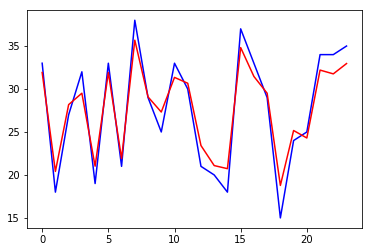

In [24]:
plt.plot(y, color='blue')
plt.plot(y_pred, color='red')